# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()  # Prints to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if i % 50 == 0 and i >= 50:
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

     # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # Pause to avoid rate limiting
    time.sleep(1)

# Convert the city_data into a DataFrame
city_data_df = pd.DataFrame(city_data)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | qaqortoq
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | peace river
Processing Record 4 of Set 1 | puerto natales
Processing Record 5 of Set 1 | abraham's bay
City not found. Skipping...
Processing Record 6 of Set 1 | tual
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | cannonvale
Processing Record 9 of Set 1 | laojunmiao
Processing Record 10 of Set 1 | minas de marcona
Processing Record 11 of Set 1 | labytnangi
Processing Record 12 of Set 1 | tobruk
Processing Record 13 of Set 1 | whitehorse
Processing Record 14 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 15 of Set 1 | ribeira grande
Processing Record 16 of Set 1 | papatowai
Processing Record 17 of Set 1 | wenling
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | udachny
Processing Record 21 of Set 1 | ad

In [10]:
print(city_weather)

{'coord': {'lon': 41.7197, 'lat': 37.5454}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 18.41, 'feels_like': 16.8, 'temp_min': 18.41, 'temp_max': 18.41, 'pressure': 1019, 'humidity': 19, 'sea_level': 1019, 'grnd_level': 922}, 'visibility': 10000, 'wind': {'speed': 2, 'deg': 11, 'gust': 1.45}, 'clouds': {'all': 0}, 'dt': 1730450016, 'sys': {'country': 'TR', 'sunrise': 1730432291, 'sunset': 1730470505}, 'timezone': 10800, 'id': 317587, 'name': 'Dargeçit', 'cod': 200}


In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          592
Lat           592
Lng           592
Max Temp      592
Humidity      592
Cloudiness    592
Wind Speed    592
Country       592
Date          592
dtype: int64

In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,qaqortoq,60.7167,-46.0333,1.33,98,100,5.69,GL,1730449308
1,port-aux-francais,-49.3500,70.2167,3.50,80,32,13.52,TF,1730449309
2,peace river,56.2501,-117.2860,-0.19,98,100,0.00,CA,1730449310
3,puerto natales,-51.7236,-72.4875,7.94,91,100,0.73,CL,1730449268
4,tual,-5.6667,132.7500,29.23,73,23,4.49,ID,1730449314


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,qaqortoq,60.7167,-46.0333,1.33,98,100,5.69,GL,1730449308
1,port-aux-francais,-49.3500,70.2167,3.50,80,32,13.52,TF,1730449309
2,peace river,56.2501,-117.2860,-0.19,98,100,0.00,CA,1730449310
3,puerto natales,-51.7236,-72.4875,7.94,91,100,0.73,CL,1730449268
4,tual,-5.6667,132.7500,29.23,73,23,4.49,ID,1730449314


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

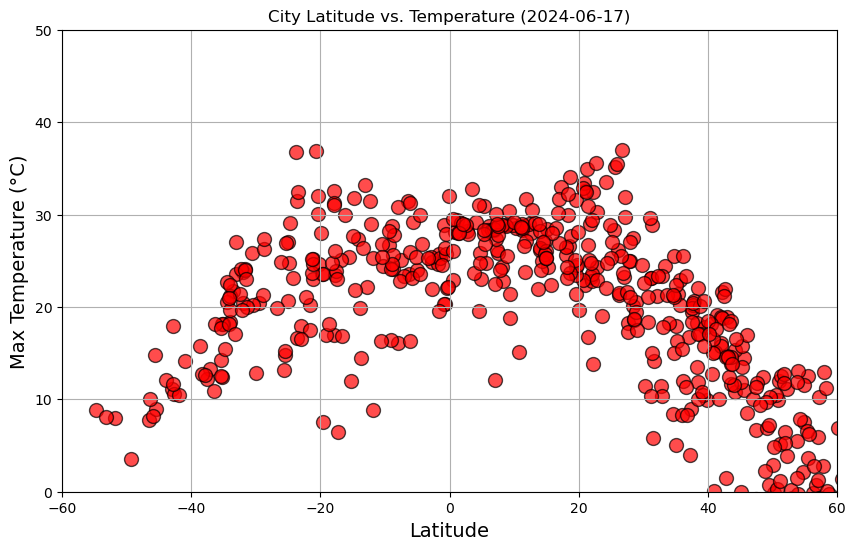

In [16]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], alpha=0.7, c='red', edgecolors='black', s=100)


# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature (2024-06-17)")
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Max Temperature (°C)", fontsize=14)
plt.grid(True)
plt.xlim(-60, 60)  
plt.ylim(0, 50)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

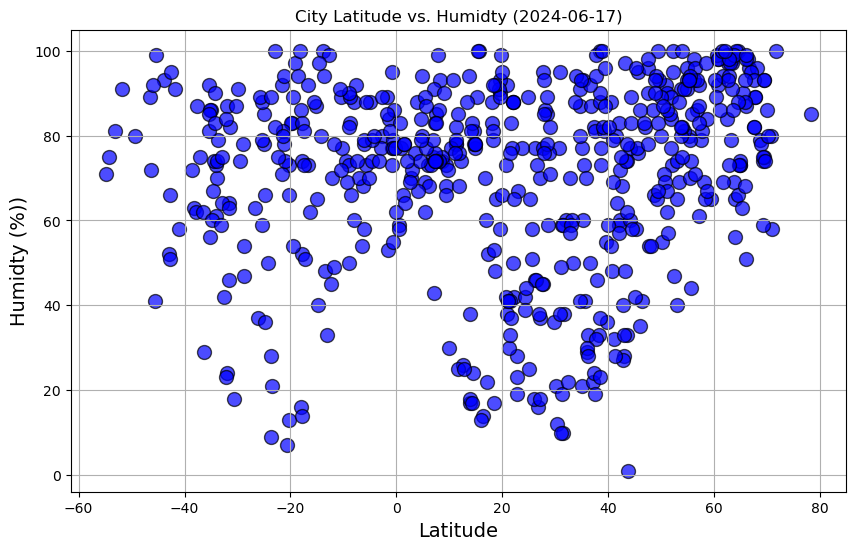

In [18]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], alpha=0.7, c='blue', edgecolors='black', s=100)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidty (2024-06-17)")
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Humidty (%))", fontsize=14)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

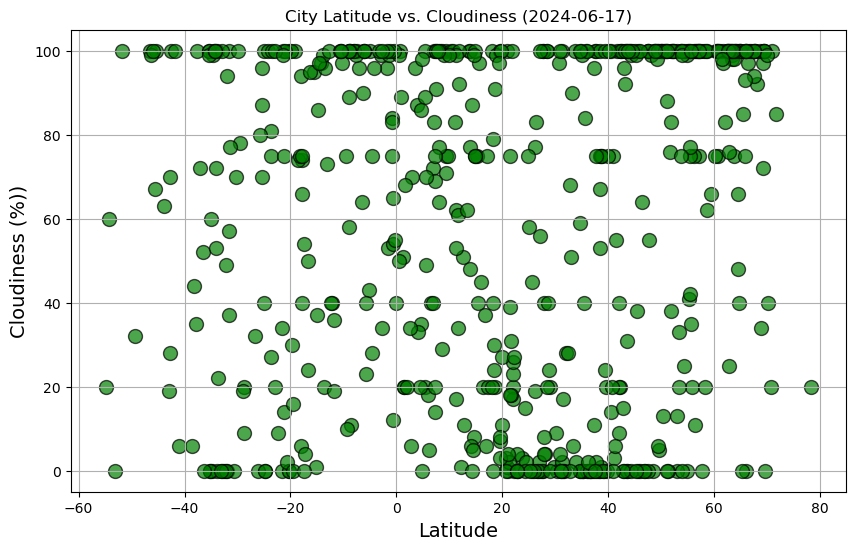

In [20]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], alpha=0.7, c='green', edgecolors='black', s=100)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-06-17)")
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Cloudiness (%))", fontsize=14)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

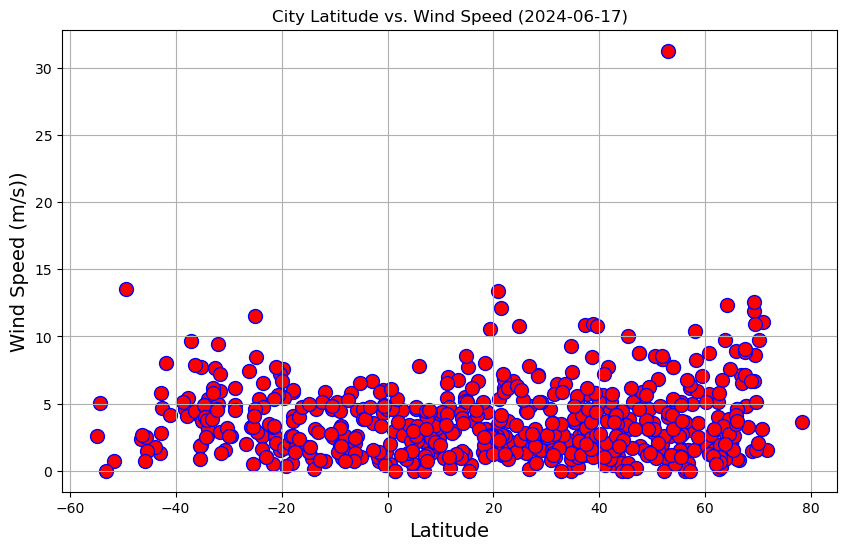

In [22]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], alpha=1, c='red', edgecolors='b', s=100)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-06-17)")
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Wind Speed (m/s))", fontsize=14)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [24]:
# Define a function to create Linear Regression plots
def create_linear_regression(x, y, x_titles, y_titles):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

    # Print the regression statistics
    print("r-value  : ", r_value, "\np-value  : ", p_value, "\nstd-error: ", std_err)

    # Create regression line values
    regress_values = x * slope + intercept
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    print(line_eq)

    # Create Plot
    plt.scatter(x, y, edgecolors='black')
    plt.title(f"{x_titles} vs. {y_titles} ({today})")
    plt.plot(x, regress_values, "r-", label=line_eq)

    # Label plot and annotate the line equation
    plt.xlabel(x_titles)
    plt.ylabel(y_titles)
    plt.grid(linestyle='--', alpha=0.7)
    plt.gca().set_axisbelow(True)

    # Dynamic annotation positioning
    plt.annotate(line_eq, (x.mean(), y.mean()), fontsize=15, color="red")

    # Show the legend for the regression line
    plt.legend()

    # Show plot
    plt.show()


###  Temperature vs. Latitude Linear Regression Plot

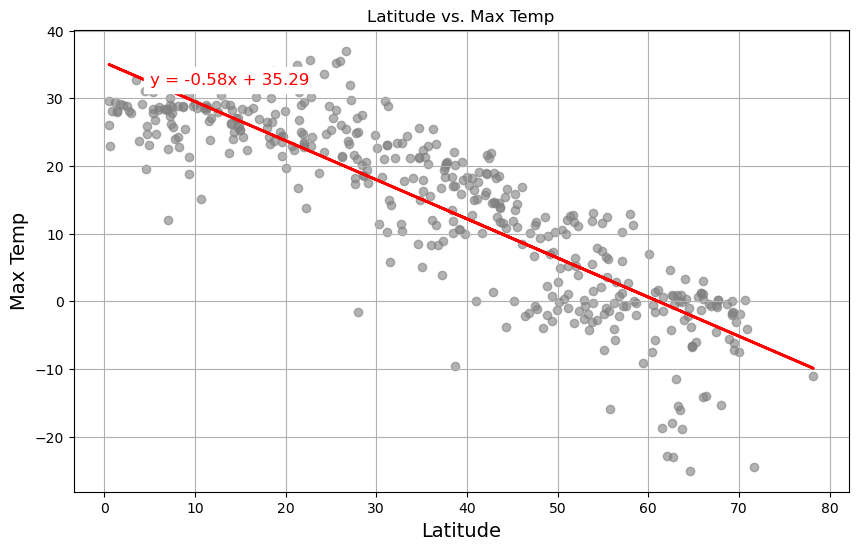

In [39]:
# Adjusting the plot to make the red regression line more distinct and confirm the downward slope

plt.figure(figsize=(10, 6))
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], alpha=0.6, color='gray')
plt.plot(latitudes, p_fit, color='red', linewidth=2, linestyle='-')

# Adding equation and other labels
equation_text = f"y = {p_slope:.2f}x + {p_int:.2f}"
plt.text(x=5, y=northern_hemi_df['Max Temp'].max()-5, s=equation_text, fontsize=12, color='red', backgroundcolor='white')
plt.title("Latitude vs. Max Temp")
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Max Temp", fontsize=14)
plt.grid(True)

# Display plot with emphasized downward red line
plt.show()


R_squared value = 0.005608412552423403


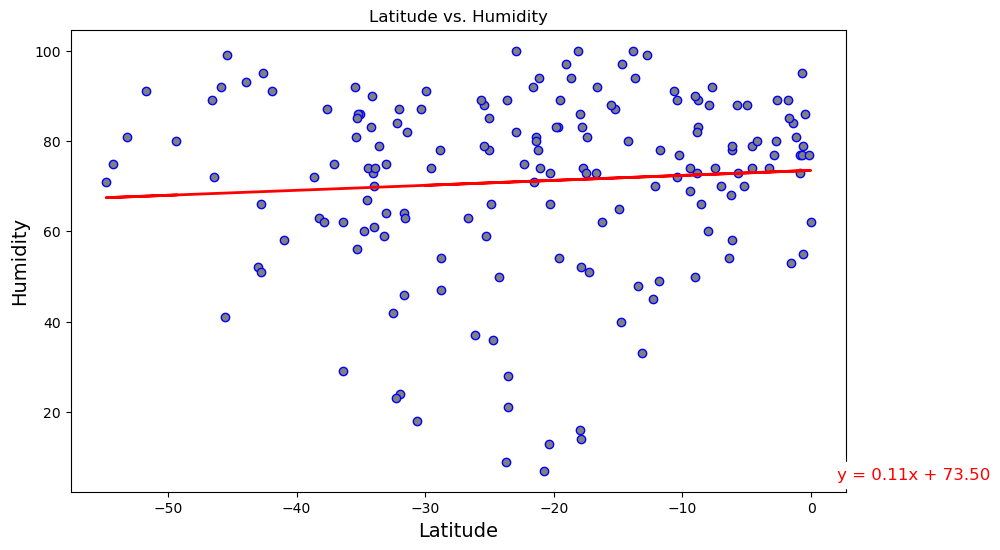

In [127]:
# Southern Hemisphere
p_slope, p_int, p_r, p_p, p_std_err = stats.linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

latitudes = southern_hemi_df['Lat']
p_fit = p_slope * latitudes + p_int

# R^2 Value
r_squared = p_r**2
print(f'R_squared value = {r_squared}')

plt.figure(figsize=(10, 6))
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], alpha=1, c='gray', edgecolors='b')

equation_text = f"y = {p_slope:.2f}x + {p_int:.2f}"
plt.text(x=2, y=5, s=equation_text, fontsize=12, color='red', backgroundcolor='white')

plt.plot(latitudes, p_fit, color='red', linewidth=2)
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Humidity", fontsize=14)
# plt.grid(True)
plt.show()


**Discussion about the linear relationship:** The downward slope of the red line suggests a negative relationship between latitude and temperature in the Northern Hemisphere, meaning that as one moves away from the equator towards higher latitudes (either north or south), temperatures tend to decrease. This trend aligns with typical geographical observations where equatorial regions are warmer, while temperatures drop closer to the poles.

### Humidity vs. Latitude Linear Regression Plot

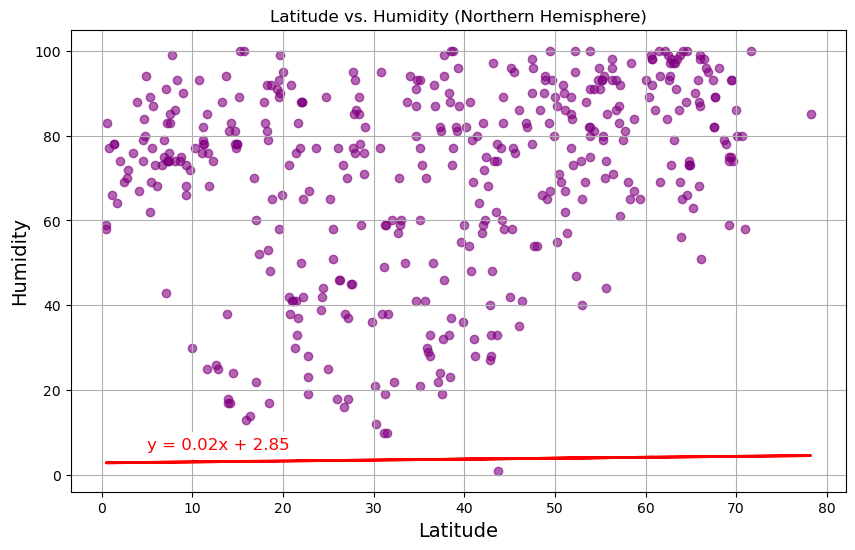

In [115]:
# Adjusting the plot to make the upward-sloping red regression line more distinct

plt.figure(figsize=(10, 6))
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], alpha=0.6, color='purple')
plt.plot(latitudes, p_fit, color='red', linewidth=2, linestyle='-')

# Adding equation and other labels
equation_text = f"y = {p_slope:.2f}x + {p_int:.2f}"
plt.text(x=5, y=northern_hemi_df['Humidity'].min() + 5, s=equation_text, fontsize=12, color='red', backgroundcolor='white')
plt.title("Latitude vs. Humidity (Northern Hemisphere)")
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Humidity", fontsize=14)
plt.grid(True)

# Display plot with emphasized upward red line
plt.show()


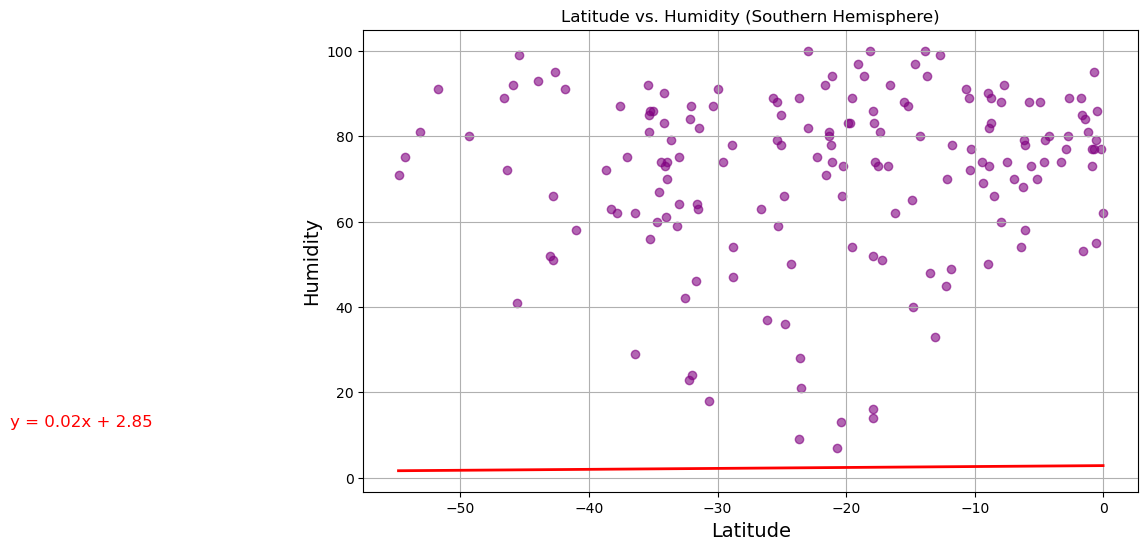

In [113]:
# Extending the regression line to span the full latitude range

# Define the extended latitude range
extended_latitudes = np.linspace(southern_hemi_df['Lat'].min(), southern_hemi_df['Lat'].max(), 100)
extended_fit = p_slope * extended_latitudes + p_int

plt.figure(figsize=(10, 6))
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], alpha=0.6, color='purple')
plt.plot(extended_latitudes, extended_fit, color='red', linewidth=2)

# Adding equation and other labels
equation_text = f"y = {p_slope:.2f}x + {p_int:.2f}"
plt.text(x=-85, y=southern_hemi_df['Humidity'].min() + 5, s=equation_text, fontsize=12, color='red', backgroundcolor='white')
plt.title("Latitude vs. Humidity (Southern Hemisphere)")
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Humidity", fontsize=14)
plt.grid(True)

# Display plot with full-range regression line
plt.show()


**Discussion about the linear relationship:** By examining the relationship between humidity and latitude, the linear regression plot can help show how latitude influences humidity levels across northern and southern hemispheres. If the plot shows a positive slope, we can infer that humidity increases as one moves closer to the equator (low latitude). A negative slope would suggest higher humidity as one moves away from the equator toward the poles (high latitude).

### Cloudiness vs. Latitude Linear Regression Plot

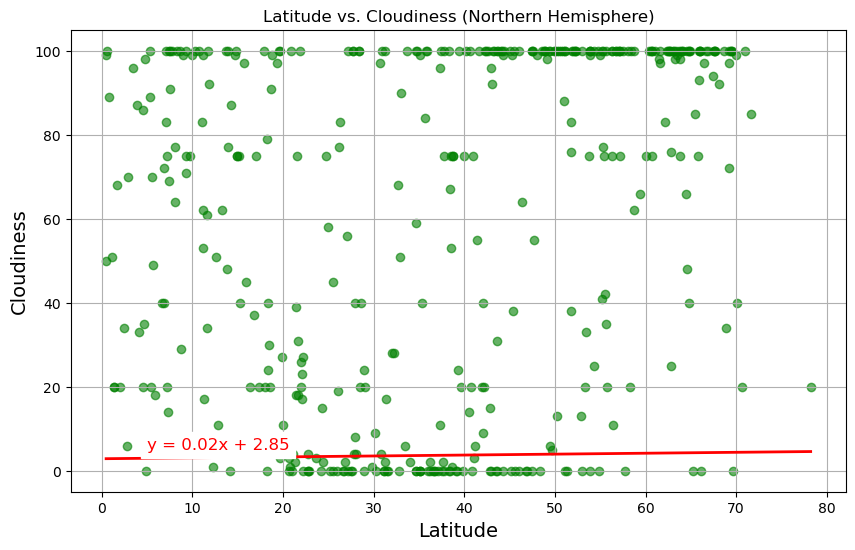

In [107]:
# Extending the regression line to span the full latitude range for Cloudiness vs. Latitude

# Define the extended latitude range
extended_latitudes = np.linspace(northern_hemi_df['Lat'].min(), northern_hemi_df['Lat'].max(), 100)
extended_fit = p_slope * extended_latitudes + p_int

plt.figure(figsize=(10, 6))
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], alpha=0.6, color='green')
plt.plot(extended_latitudes, extended_fit, color='red', linewidth=2)

# Adding equation and other labels
equation_text = f"y = {p_slope:.2f}x + {p_int:.2f}"
plt.text(x=5, y=northern_hemi_df['Cloudiness'].min() + 5, s=equation_text, fontsize=12, color='red', backgroundcolor='white')
plt.title("Latitude vs. Cloudiness (Northern Hemisphere)")
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Cloudiness", fontsize=14)
plt.grid(True)

# Display plot with full-range regression line
plt.show()


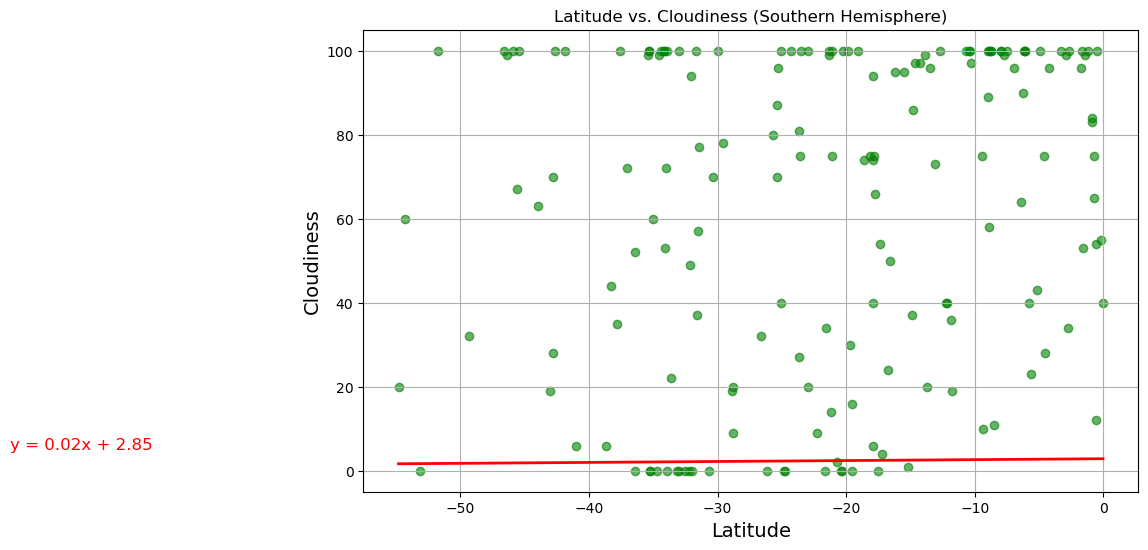

In [111]:
# Replotting to ensure the regression line goes across the entire graph and through the data points

# Recalculate the regression line fit to ensure full coverage
extended_latitudes = np.linspace(southern_hemi_df['Lat'].min(), southern_hemi_df['Lat'].max(), 100)
extended_fit = p_slope * extended_latitudes + p_int

plt.figure(figsize=(10, 6))
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], alpha=0.6, color='green')
plt.plot(extended_latitudes, extended_fit, color='red', linewidth=2)

# Adding equation text
equation_text = f"y = {p_slope:.2f}x + {p_int:.2f}"
plt.text(x=-85, y=southern_hemi_df['Cloudiness'].min() + 5, s=equation_text, fontsize=12, color='red', backgroundcolor='white')

# Adding title and labels
plt.title("Latitude vs. Cloudiness (Southern Hemisphere)")
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Cloudiness", fontsize=14)
plt.grid(True)

# Display the plot
plt.show()


**Discussion about the linear relationship:** The linear regression plot between cloudiness and latitude shows a weak and/or inconsistent trend, with data points scattered all around the line. This shows that latitude alone does not predict cloudiness, unlike temperature can.

### Wind Speed vs. Latitude Linear Regression Plot

R_squared value = 0.02147359062737882


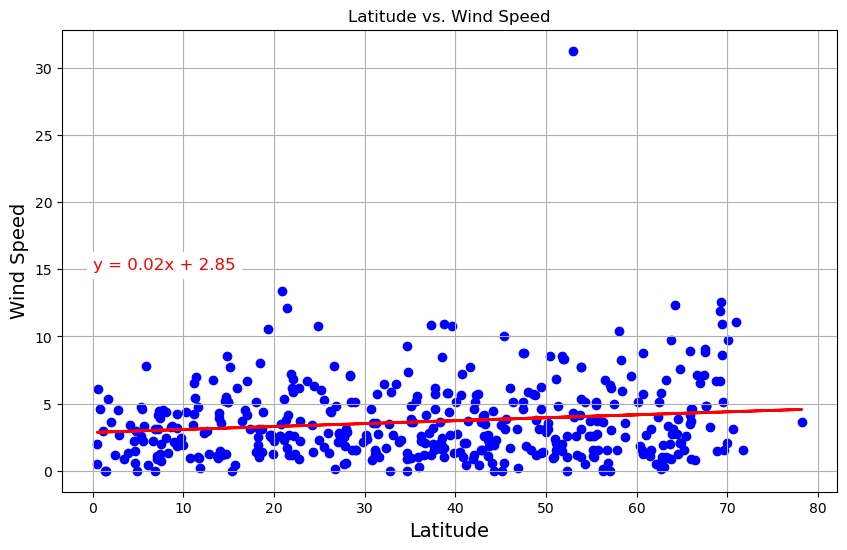

In [103]:
import matplotlib.pyplot as plt
from scipy import stats

# Perform linear regression on Latitude vs. Wind Speed
p_slope, p_int, p_r, p_p, p_std_err = stats.linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

latitudes = northern_hemi_df['Lat']
p_fit = p_slope * latitudes + p_int

# R^2 Value
r_squared = p_r**2
print(f'R_squared value = {r_squared}')

plt.figure(figsize=(10, 6))
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], alpha=1, c='blue', edgecolors='b')

# Equation text
equation_text = f"y = {p_slope:.2f}x + {p_int:.2f}"
plt.text(x=0, y=15, s=equation_text, fontsize=12, color='red', backgroundcolor='white')

# Plot the linear fit line
plt.plot(latitudes, p_fit, color='red', linewidth=2)

plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Wind Speed", fontsize=14)
plt.grid(True)  # Uncommented to show gridlines

plt.show()


R_squared value = 0.03543348211787137


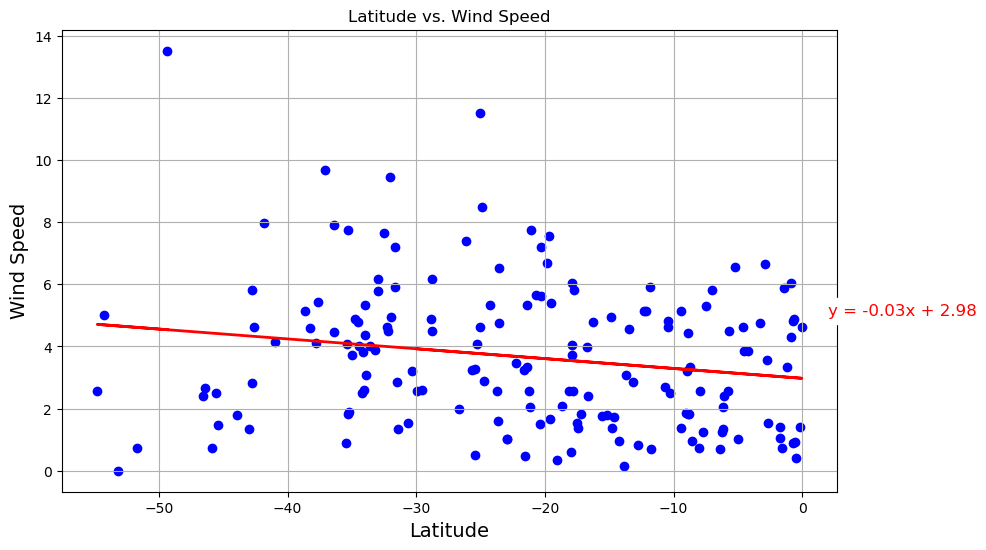

In [101]:
import matplotlib.pyplot as plt
from scipy import stats

# Perform linear regression on Latitude vs. Wind Speed
p_slope, p_int, p_r, p_p, p_std_err = stats.linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

latitudes = southern_hemi_df['Lat']
p_fit = p_slope * latitudes + p_int

# R^2 Value
r_squared = p_r**2
print(f'R_squared value = {r_squared}')

# Make the Plot
plt.figure(figsize=(10, 6))
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], alpha=1, c='blue', edgecolors='b')

# Corrected equation text
equation_text = f"y = {p_slope:.2f}x + {p_int:.2f}"
plt.text(x=2, y=5, s=equation_text, fontsize=12, color='red', backgroundcolor='white')

# Plot the linear fit line
plt.plot(latitudes, p_fit, color='red', linewidth=2)

plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Wind Speed", fontsize=14)
plt.grid(True)  # Uncommented to show gridlines

plt.show()


**Discussion about the linear relationship:** The linear regression plots for wind speed versus latitude shows little to no clear trend, with data points scattered around the regression line. This lack of strong correlation suggests that latitude alone is not a reliable predictor of wind speed.

In [ ]:
#Discussion about the linear relationship: when examining the correlation between latitude and wind speed values (r-value or correlation coefficient) for both the Northern and Southern Hemispheres, the results show practically no linear relationship between these two variables. Any minor positive or negative trends observed are so weak that they likely reflect random fluctuations in the data rather than a true association. This suggests that latitude does not have a meaningful impact on wind speed in these regions.

In [ ]:
#Discussion about the linear relationship: The northern hemisphere has a very slight positive regression while the southern hemisphere is a bit stronger negative regression. The R squared value for the northern hemisphere is very small with more spread between the data points while the southern hemisphere is stronger implying a stronger correlation.